# Röntgenspektrum

In [1]:
#import modules
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import chi2

plt.style.use('seaborn-white')
plt.rcParams['errorbar.capsize']=2
%matplotlib inline

In [2]:
#converter
def string2float (valstr):
    return float (valstr.decode("utf-8").replace(',','.'))

#fit functions
#linear function
def linear(x, a, c):
    return x*a+c
#gausssian function
def gaussian(x, A, mu, sig, y0):
    return y0 + (A*np.exp(-(x-mu)**2/(2*sig**2)))
#function to approximate the data and to take the inconstant underground into account
def overkill(x, a, c, A1, mu1, sig1, A2, mu2, sig2):
    return linear(x, a, c)+gaussian(x, A1, mu1, sig1, 0)+gaussian(x, A2, mu2, sig2, 0)

## Abschätzen der Planckschen Konstante

Text(0,0.5,'Intensität [1/s]')

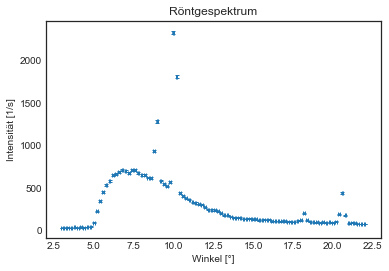

In [3]:
#load data
angle, inten= np.loadtxt('Daten/01_03_2018 09_38_46.txt',
                         skiprows=0,
                         converters={0:string2float, 1:string2float},
                         unpack=True)
inten_err = np.sqrt(inten/5)
angle_err = 0.05

#plot data
plt.figure('data, total')
plt.errorbar(angle, inten, inten_err, angle_err, linestyle = 'None')
plt.title('Röntgespektrum')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [1/s]')

In [4]:
#fit underground
maskPlanck1 = (angle<5)
anglePlanck1 = angle[maskPlanck1]
intPlanck1 = inten[maskPlanck1]
intPlanck1_err = inten_err[maskPlanck1]
popt1, pcov1 = curve_fit(linear, anglePlanck1, intPlanck1, sigma = intPlanck1_err)
perr1 = np.sqrt(np.diag(pcov1))
print('Untergrund:')
print('Steigung = %.1e +- %.1e'%(popt1[0], perr1[0]))
print('y_Achse = %.0e +- %.0e'%(popt1[1], perr1[1]))

#fit start
maskPlanck2 = [(angle>=5)&(angle<5.7)]
anglePlanck2 = angle[maskPlanck2]
intPlanck2 = inten[maskPlanck2]
intPlanck2_err = inten_err[maskPlanck2]
popt2, pcov2 = curve_fit(linear, anglePlanck2, intPlanck2, sigma = intPlanck2_err)
perr2 = np.sqrt(np.diag(pcov2))
print('Linearer Anstieg:')
print('Steigung = %.2e +- %.1e'%(popt2[0], perr2[0]))
print('y_Achse = %.2e +- %.1e'%(popt2[1], perr2[1]))


Untergrund:
Steigung = 8.7e+00 +- 1.6e+00
y_Achse = -3e+00 +- 6e+00
Linearer Anstieg:
Steigung = 6.13e+02 +- 2.1e+01
y_Achse = -2.97e+03 +- 1.1e+02


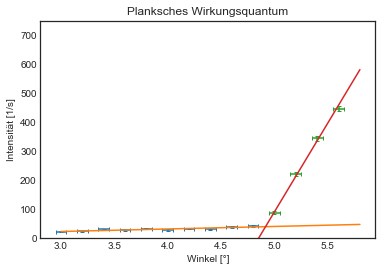

In [5]:
#plot fit
x = np.linspace(angle[0], 5.8, 300)
plt.figure('planck')
plt.ylim(0, 750)
plt.errorbar(anglePlanck1, intPlanck1, intPlanck1_err, angle_err, linestyle = 'None', label='Untergrund, Messwerte')
plt.plot(x, linear(x, *popt1), marker='', label = 'Untergrund, Fit')
plt.errorbar(anglePlanck2, intPlanck2, intPlanck2_err, angle_err, linestyle = 'None', label='Linearer Anstieg, Messwerte')
plt.plot(x, linear(x, *popt2), marker='', label = 'Linearer Anstieg, Fit')
plt.title('Planksches Wirkungsquantum')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [1/s]')
plt.savefig('Diagramme/Planck1.pdf')

In [6]:
#fit quality underground
print('Güte des Fits (Untergrund):')
chisquare=np.sum(((linear(anglePlanck1,*popt1)-intPlanck1)**2/intPlanck1_err))
dof=intPlanck1.size-len(popt1)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print('Chi^2 =', chisquare)
print('Chi^2 reduziert =', chisquare_red)
print('Fitwahrscheinlichkeit =', prob, '%')
print()

#fit quality linear increas
print('Güte des Fits (linearer Ansieg):')
chisquare=np.sum(((linear(anglePlanck2,*popt2)-intPlanck2)**2/intPlanck2_err**2))
dof=intPlanck2.size-len(popt2)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print('Chi^2 =', chisquare)
print('Chi^2 reduziert =', chisquare_red)
print('Fitwahrscheinlichkeit =', prob, '%')

Güte des Fits (Untergrund):
Chi^2 = 29.5664487573
Chi^2 reduziert = 3.69580609466
Fitwahrscheinlichkeit = 0.0 %

Güte des Fits (linearer Ansieg):
Chi^2 = 4.13741390927
Chi^2 reduziert = 2.06870695464
Fitwahrscheinlichkeit = 13.0 %


## K-alpha und K-beta Peaks im LiF Kristall

### 1. Ordnung

In [7]:
#load data, first order
angleD, intD= np.loadtxt('Daten/01_03_2018 09_55_32.txt',
                         skiprows=0,
                         converters={0:string2float, 1:string2float},
                         unpack=True)
intD_err = np.sqrt(intD/20)

In [8]:
#beta line fit
maskB = [(angleD>8.5)&(angleD<9.3)]
angleB = angleD[maskB]
intB = intD[maskB]
intB_err = intD_err[maskB]
poptB, pcovB = curve_fit(gaussian, angleB, intB, sigma = intB_err, p0 = [700, 9, 0.1, 600])
perrB = np.sqrt(np.diag(pcovB))

#alpha line fit
maskA = [(angleD>9.6)&(angleD<10.5)]
angleA = angleD[maskA]
intA = intD[maskA]
intA_err = intD_err[maskA]
poptA, pcovA = curve_fit(gaussian, angleA, intA, sigma = intA_err,  p0 = [2500, 10, 0.1, 560])
perrA = np.sqrt(np.diag(pcovA))

#fit values
print(r'K-beta-Fit:')
print(poptB, '+-', perrB)
print(r'K-alpha-Fit:')
print(poptA, '+-', perrA)

K-beta-Fit:
[  7.77710909e+02   8.91449290e+00   1.14881195e-01   5.93919404e+02] +- [  6.96879404e+01   9.41485919e-03   1.45529466e-02   5.17511523e+01]
K-alpha-Fit:
[  2.54412275e+03   1.00574514e+01   1.07847046e-01   4.81319773e+02] +- [  1.01156076e+02   3.96992220e-03   4.57176268e-03   3.63719107e+01]


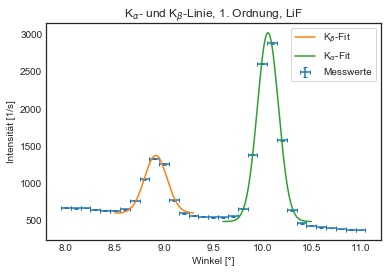

In [9]:
#plot data
xB = np.linspace(8.5, 9.3, 200)
xA = np.linspace(9.6, 10.5, 200)
plt.figure('first order')
plt.errorbar(angleD, intD, intD_err, angle_err, linestyle = 'None', label = 'Messwerte')
plt.plot(xB, gaussian(xB, *poptB), marker = '', label = r'K$_\beta$-Fit')
plt.plot(xA, gaussian(xA, *poptA), marker = '', label = r'K$_\alpha$-Fit')
plt.legend(frameon=True)
plt.title(r'K$_\alpha$- und K$_\beta$-Linie, 1. Ordnung, LiF')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [1/s]')
plt.savefig('Diagramme/LiF, 1.Ordnung.pdf')

In [10]:
#fit quality
print('Güte des Fits (K_alpha)')
chisquare=np.sum(((gaussian(angleA,*poptA)-intA)**2/intA_err**2))
dof=intA.size-len(poptA)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print('Chi^2 =', chisquare)
print('Chi^2 reduziert =', chisquare_red)
print('Fitwahrscheinlichkeit =', prob, '%')
print()

#fit quality
print('Güte des Fits (K_beta)')
chisquare=np.sum(((gaussian(angleB,*poptB)-intB)**2/intB_err**2))
dof=intB.size-len(poptB)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print('Chi^2 =', chisquare)
print('Chi^2 reduziert =', chisquare_red)
print('Fitwahrscheinlichkeit =', prob, '%')

Güte des Fits (K_alpha)
Chi^2 = 410.819382397
Chi^2 reduziert = 102.704845599
Fitwahrscheinlichkeit = 0.0 %

Güte des Fits (K_beta)
Chi^2 = 251.429627341
Chi^2 reduziert = 83.8098757805
Fitwahrscheinlichkeit = 0.0 %


Zusammengefasster Fit:
[ -1.04899585e+02   1.52300154e+03   2.54981790e+03   1.00594573e+01
   1.08925782e-01   7.84901651e+02   8.92028522e+00   1.15628919e-01] +- [  4.22835246e+00   4.13962024e+01   3.73118087e+01   1.48176443e-03
   1.34948939e-03   2.56574112e+01   3.86705779e-03   3.84152298e-03] in der Reihenfolge
Steigung und y-Achsenabschnitt der Gerade, Normierung, Mittelwert und Sigma der Gaußfunktionen für k-alpha/K-beta Linie


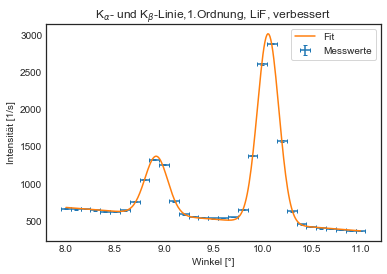

In [11]:
#overkill fit
popt, pcov = curve_fit(overkill, angleD, intD, sigma = intD_err, p0 = [-30, 1000, 2500, 10, 0.1, 700, 9, 0.1])
perr = np.sqrt(np.diag(pcov))

#fit values
print('Zusammengefasster Fit:')
print(popt, '+-', perr, 'in der Reihenfolge')
print('Steigung und y-Achsenabschnitt der Gerade, Normierung, Mittelwert und Sigma der Gaußfunktionen für k-alpha/K-beta Linie')

#plot data again
plt.figure('first order, better')
x = np.linspace(8, 11, 300)
plt.errorbar(angleD, intD, intD_err, angle_err, linestyle = 'None', label = 'Messwerte')
plt.plot(x, overkill(x, *popt), marker = '', label = 'Fit')
plt.legend(frameon=True)
plt.title(r'K$_\alpha$- und K$_\beta$-Linie,1.Ordnung, LiF, verbessert')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [1/s]')
plt.savefig('Diagramme/LiF, 1.Ordnung, verbessert,.pdf')

In [12]:
#fit quality
chisquare=np.sum(((overkill(angleD,*popt)-intD)**2/intD_err**2))
dof=intD.size-len(popt)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print('Chi^2 =', chisquare)
print('Chi^2 reduziert =', chisquare_red)
print('Fitwahrscheinlichkeit =', prob, '%')

Chi^2 = 329.97861656
Chi^2 reduziert = 14.3468963722
Fitwahrscheinlichkeit = 0.0 %


### 2. Ordnung

In [13]:
#load data, second order
angleD2, intD2= np.loadtxt('Daten/01_03_2018 10_10_41.txt',
                         skiprows=0,
                         converters={0:string2float, 1:string2float},
                         unpack=True)
intD2_err = np.sqrt(intD2/20)

In [14]:
#beta line fit
maskB2 = [(angleD2>17.5)&(angleD2<19)]
angleB2 = angleD2[maskB2]
intB2 = intD2[maskB2]
intB2_err = intD2_err[maskB2]
poptB2, pcovB2 = curve_fit(gaussian, angleB2, intB2, sigma = intB2_err, p0 = [100, 18.3, 0.2, 100])
perrB2 = np.sqrt(np.diag(pcovB2))

#alpha line fit
maskA2 = [(angleD2>20)&(angleD2<21.3)]
angleA2 = angleD2[maskA2]
intA2 = intD2[maskA2]
intA2_err = intD2_err[maskA2]
poptA2, pcovA2 = curve_fit(gaussian, angleA2, intA2, sigma = intA2_err,  p0 = [350, 20.5, 0.2, 100])
perrA2 = np.sqrt(np.diag(pcovA2))

#fit values
print(r'K-beta-Fit:')
print(poptB2, '+-', perrB2)
print(r'K-alpha-Fit:')
print(poptA2, '+-', perrA2)

K-beta-Fit:
[  95.25283619   18.21022855    0.11323165  103.54948261] +- [ 9.92118093  0.01220244  0.01282603  3.02267999]
K-alpha-Fit:
[  3.46443657e+02   2.05802276e+01   1.23755331e-01   8.57866636e+01] +- [  8.44103693e+00   2.84605024e-03   2.92252740e-03   2.20139464e+00]


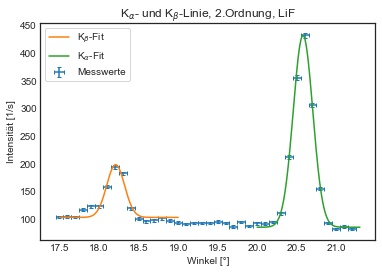

In [15]:
#plot data
xB2 = np.linspace(17.5, 19, 200)
xA2 = np.linspace(20, 21.3, 200)
plt.figure('second order')
plt.errorbar(angleD2, intD2, intD2_err, angle_err, linestyle = 'None', label = 'Messwerte')
plt.plot(xB2, gaussian(xB2, *poptB2), marker = '', label = r'K$_\beta$-Fit')
plt.plot(xA2, gaussian(xA2, *poptA2), marker = '', label = r'K$_\alpha$-Fit')
plt.legend(frameon=True)
plt.title(r'K$_\alpha$- und K$_\beta$-Linie, 2.Ordnung, LiF')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [1/s]')
plt.savefig('Diagramme/LiF, 2.Ordnung.pdf')

In [16]:
#fit quality, beta-Peak
chisquare=np.sum(((gaussian(angleB2,*poptB2)-intB2)**2/intB2_err**2))
dof=intB2.size-len(poptB2)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print('Chi^2 =', chisquare)
print('Chi^2 reduziert =', chisquare_red)
print('Fitwahrscheinlichkeit =', prob, '%')

#fit quality, alpha-Peak
chisquare=np.sum(((gaussian(angleA2,*poptA2)-intA2)**2/intA2_err**2))
dof=intA2.size-len(poptA2)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print('Chi^2 =', chisquare)
print('Chi^2 reduziert =', chisquare_red)
print('Fitwahrscheinlichkeit =', prob, '%')

Chi^2 = 139.029105198
Chi^2 reduziert = 13.9029105198
Fitwahrscheinlichkeit = 0.0 %
Chi^2 = 45.3584785241
Chi^2 reduziert = 5.66980981551
Fitwahrscheinlichkeit = 0.0 %


## Bestimmen der Planckschen Konstante

In [17]:
#load data
U = np.arange(20, 36)
U_err = 0.05
I = np.array([1.3, 2.55, 4.9, 11.55, 87.2, 168.9, 230.0, 293.7, 355.4, 419.2, 475.6, 522.6, 580.5, 630.5, 676.5, 733.2])
I_err = np.sqrt(I/20)

#linear fit
popt, pcov = curve_fit(linear, U[4:-5], I[4:-5], sigma = I_err[4:-5])
perr = np.sqrt(np.diag(pcov))

Fit-Parameter:
[   65.44012578 -1477.0934039 ] +- [  1.55876679  40.43560772]


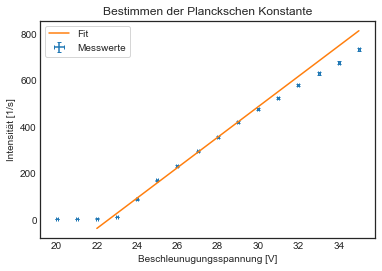

In [18]:
#plot data and fit
x = np.linspace(22, 35, 200)
plt.figure('plack2')
plt.errorbar(U, I, I_err, U_err, linestyle = 'None', label = 'Messwerte')
plt.plot(x, linear(x, *popt), label = 'Fit')
plt.legend(frameon=True)
plt.title('Bestimmen der Planckschen Konstante')
plt.xlabel('Beschleunugungsspannung [V]')
plt.ylabel('Intensität [1/s]')
print('Fit-Parameter:')
print(popt, '+-', perr)
plt.savefig('Diagramme/Planck2.pdf')

In [19]:
#fit quality
chisquare=np.sum(((linear(U[4:-5],*popt)-I[4:-5])**2/I_err[4:-5]**2))
dof=U[4:-5].size-len(popt)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print('Chi^2 =', chisquare)
print('Chi^2 reduziert =', chisquare_red)
print('Fitwahrscheinlichkeit =', prob, '%')

Chi^2 = 29.4011210463
Chi^2 reduziert = 5.88022420926
Fitwahrscheinlichkeit = 0.0 %


## K-alpha und K-beta Peaks im NaCl Kristall

In [20]:
#load data
angleD, intD= np.loadtxt('Daten/01_03_2018 10_40_33.txt',
                         skiprows=0,
                         converters={0:string2float, 1:string2float},
                         unpack=True)
intD_err = np.sqrt(intD/5)

Text(0,0.5,'Intensität [1/s]')

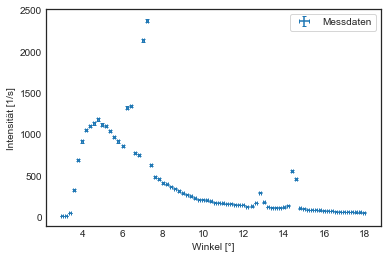

In [21]:
plt.figure('nacl')
plt.errorbar(angleD, intD, intD_err, angle_err, label = 'Messdaten', linestyle = 'None')
plt.legend(frameon=True)
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [1/s]')

### 1. Ordnung

In [22]:
#data
angleD1 = angleD[13:26]
intD1 = intD[13:26]
intD1_err = intD_err[13:26]

Zusammengefasster Fit:
[ -2.28572756e+02   2.23715244e+03   7.86695056e+02   6.30888607e+00
   1.14006668e-01   2.44807877e+03   7.11069847e+00   1.11849325e-01] +- [  7.08609225e+00   5.18506960e+01   5.87731648e+01   4.16980454e-03
   1.11508590e-02   6.32796623e+01   1.65758822e-03   3.25254070e-03]
in der Reihenfolge
Steigung und y-Achsenabschnitt der Gerade, Normierung, Mittelwert und Sigma der Gaußfunktionen für k-alpha/K-beta Linie


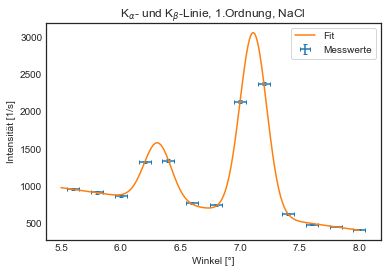

In [23]:
#overkill fit
popt1, pcov1 = curve_fit(overkill, angleD1, intD1, sigma = intD1_err, p0 = [-250, 2000, 500, 6.5, 0.2, 1600, 7.3, 0.2])
perr1 = np.sqrt(np.diag(pcov1))

#fit values
print('Zusammengefasster Fit:')
print(popt1, '+-', perr1)
print('in der Reihenfolge')
print('Steigung und y-Achsenabschnitt der Gerade, Normierung, Mittelwert und Sigma der Gaußfunktionen für k-alpha/K-beta Linie')

#plot data again
plt.figure('first order, nacl')
x1 = np.linspace(5.5, 8, 300)
plt.errorbar(angleD1, intD1, intD1_err, angle_err, linestyle = 'None', label = 'Messwerte')
plt.plot(x1, overkill(x1, *popt1), marker = '', label = 'Fit')
plt.legend(frameon=True)
plt.title(r'K$_\alpha$- und K$_\beta$-Linie, 1.Ordnung, NaCl')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [1/s]')
plt.savefig('Diagramme/NaCl, 1.Ordnung.pdf')

In [24]:
#fit quality
chisquare=np.sum(((overkill(angleD1,*popt1)-intD1)**2/intD1_err**2))
dof=intD1.size-len(popt1)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print('Chi^2 =', chisquare)
print('Chi^2 reduziert =', chisquare_red)
print('Fitwahrscheinlichkeit =', prob, '%')

Chi^2 = 10.2004558421
Chi^2 reduziert = 2.04009116842
Fitwahrscheinlichkeit = 7.0 %


### 2. Ordnung

In [25]:
#data
angleD2 = angleD[44:63]
intD2 = intD[44:63]
intD2_err = intD_err[44:63]

Zusammengefasster Fit:
[ -1.49722451e+01   3.19484975e+02   1.67957505e+02   1.28112963e+01
   1.24895229e-01   5.96748378e+02   1.44845931e+01   1.14168383e-01] +- [  1.37302445e+00   1.89301312e+01   9.55589524e+00   8.49790920e-03
   6.32454248e-03   2.11836614e+01   2.77419030e-03   4.24544271e-03]
in der Reihenfolge
Steigung und y-Achsenabschnitt der Gerade, Normierung, Mittelwert und Sigma der Gaußfunktionen für k-alpha/K-beta Linie


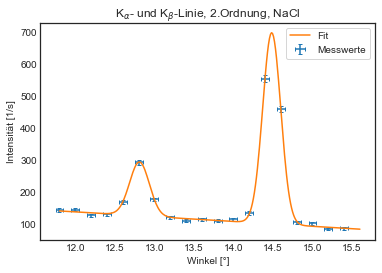

In [27]:
#overkill fit
popt2, pcov2 = curve_fit(overkill, angleD2, intD2, sigma = intD2_err, p0 = [-1.5, 300, 100, 12.9, 0.1, 550, 14.5, 0.15])
perr2 = np.sqrt(np.diag(pcov2))

#fit values
print('Zusammengefasster Fit:')
print(popt2, '+-', perr2)
print('in der Reihenfolge')
print('Steigung und y-Achsenabschnitt der Gerade, Normierung, Mittelwert und Sigma der Gaußfunktionen für k-alpha/K-beta Linie')

#plot data again
plt.figure('second order, nacl')
x2 = np.linspace(11.8, 15.6, 300)
plt.errorbar(angleD2, intD2, intD2_err, angle_err, linestyle = 'None', label = 'Messwerte')
plt.plot(x2, overkill(x2, *popt2), marker = '', label = 'Fit')
plt.legend(frameon=True)
plt.title(r'K$_\alpha$- und K$_\beta$-Linie, 2.Ordnung, NaCl')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [1/s]')
plt.savefig('Diagramme/NaCl, 2.Ordnung.pdf')

In [28]:
#fit quality
chisquare=np.sum(((overkill(angleD2,*popt2)-intD2)**2/intD2_err**2))
dof=intD2.size-len(popt2)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print('Chi^2 =', chisquare)
print('Chi^2 reduziert =', chisquare_red)
print('Fitwahrscheinlichkeit =', prob, '%')

Chi^2 = 16.1627904989
Chi^2 reduziert = 1.46934459081
Fitwahrscheinlichkeit = 14.0 %
